In [110]:
# Plot the PTAPPSO results
import numpy as np
import math
import matplotlib.pyplot as plt
% matplotlib inline

def convert(nonpso_min, nonpso_max, psocoord):
    return (nonpso_max - nonpso_min) * psocoord + nonpso_min

def convert_ra(psocoord):
    return convert(-math.pi, math.pi, psocoord)

def convert_dec(psocoord):
    return convert(-0.5*math.pi, 0.5*math.pi, psocoord)

In [129]:
# Need to process the data:
# sed -e '/^[a-zA-z\-]/d' ptapso_dump.txt | sed -e '/inf/d' >  processed.txt
partCoord_ra, partCoord_dec, partVel_ra, partVel_dec, partPbest_ra, partPbest_dec, partSnrPbest, partSnrCurr, partSnrLbest, partInertia, partLocalBest_ra, partLocalBest_dec, junk, partFitEvals = np.genfromtxt('processed.txt').transpose()

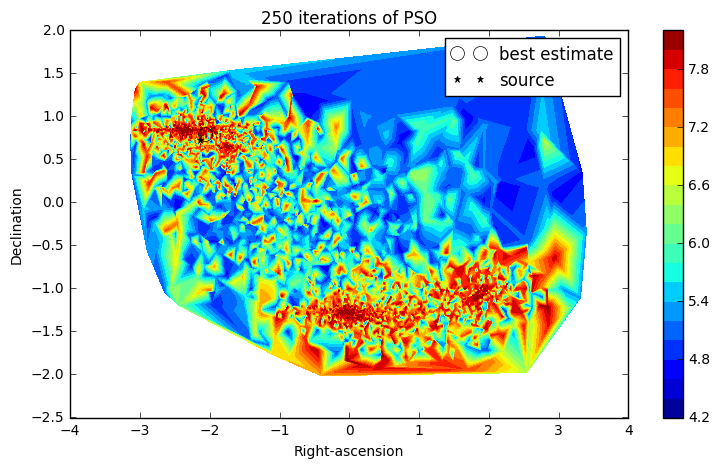

In [130]:
snr = -1.0*partSnrCurr

# The true source location of the simulated data
source_ra = -2.14
source_dec = 0.72

# The best estimate from PSO in pso coords
best_ra_psocoords = 0.170954
best_dec_psocoords = 0.752049
best_ra = convert_ra(best_ra_psocoords)
best_dec = convert_dec(best_dec_psocoords)

ra = convert_ra( partCoord_ra )
dec = convert_dec( partCoord_dec )

# P
plt.figure(figsize=(9,5))
plt.tricontourf(ra, dec, snr, 20)
plt.plot(best_ra, best_dec, 'ko', markersize=10, markerfacecolor="None")
plt.plot(source_ra, source_dec, 'k*', markersize=5)
plt.xlabel('Right-ascension')
plt.ylabel('Declination')
plt.title('250 iterations of PSO')
plt.colorbar()
plt.legend(['best estimate', 'source'], loc='best')
#plt.legend(['source'], loc='best')
plt.savefig('ptapso_data_plot.png')

In [113]:
#from scipy import interpolate
#f = interpolate.interp2d(ra, dec, snr_bigger_better, kind='cubic')
#x = np.linspace(-math.pi, math.pi, 100)
#y = np.linspace(-0.5*math.pi, 0.5*math.pi, 100)
#xx, yy = np.meshgrid(x, y)
#z = f(x,y)
#plt.contourf(x,y,z)
#plt.colorbar()

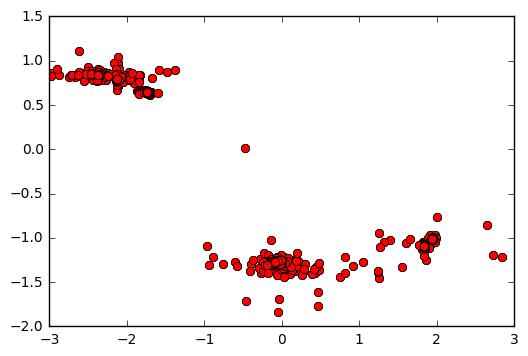

In [133]:
high_snr = []
high_ra = []
high_dec = []
for i, x in enumerate(snr):
    if x > 8.0:
        high_snr.append(x)
        high_ra.append( ra[i] )
        high_dec.append( dec[i] )
plt.plot(high_ra, high_dec, 'ro')